## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [172]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from geopy.distance import geodesic

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

In [13]:
data = pd.read_csv('../data/kc_house_data.csv')

In [14]:
data = data.dropna()

In [15]:
def zip_code(address):
    x = address.split(' ')[-3]

    return x.split(',')[0]

In [19]:
def township(address):
    x = address.split(', ')[1]

    return x

In [ ]:
(data_kc.loc[240, 'address'])

In [20]:
data['zip_code'] = data['address'].apply(lambda x: zip_code(x))

In [21]:
data = data.sort_values(by = 'zip_code')

In [22]:
data['zip_code'] = data['zip_code'].astype('int')

In [23]:
data['township'] = data['address'].apply(lambda x: township(x))

In [159]:
data_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29149 entries, 22782 to 11974
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  29149 non-null  int64  
 1   date                29149 non-null  object 
 2   price               29149 non-null  float64
 3   bedrooms            29149 non-null  int64  
 4   bathrooms           29149 non-null  float64
 5   sqft_living         29149 non-null  int64  
 6   sqft_lot            29149 non-null  int64  
 7   floors              29149 non-null  float64
 8   waterfront          29149 non-null  object 
 9   greenbelt           29149 non-null  object 
 10  nuisance            29149 non-null  object 
 11  view                29149 non-null  object 
 12  condition           29149 non-null  object 
 13  grade               29149 non-null  object 
 14  heat_source         29149 non-null  object 
 15  sewer_system        29149 non-null  object 
 16  

In [158]:
data_kc.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,zip_code,township,location,distance_to_amazon
22782,6642200450,6/22/2021,650000.0,3,2.5,2270,10993,1.0,NO,NO,...,90,1986,0,"5727 South 296th Place, Auburn, Washington 980...",47.335310,-122.261840,98001,Auburn,"(47.33531, -122.26184)",19.710501
22829,6181430200,7/26/2021,740000.0,4,2.5,3504,7500,2.0,NO,NO,...,380,2006,0,"3809 South 337th Street, Federal Way, Washingt...",47.299625,-122.283815,98001,Federal Way,"(47.299625, -122.283815)",21.992489
26067,4014400085,10/20/2021,670000.0,3,3.0,1950,40555,1.0,NO,NO,...,110,1941,0,"30820 42nd Avenue South, Auburn, Washington 98...",47.325130,-122.280980,98001,Auburn,"(47.32513, -122.28098)",20.261524


In [31]:
kc_zips =[98001,
98002,
98003,
98004,
98005,
98006,
98007,
98008,
98009,
98010,
98011,
98013,
98014,
98015,
98019,
98022,
98023,
98024,
98025,
98027,
98028,
98029,
98030,
98031,
98032,
98033,
98034,
98035,
98038,
98039,
98040,
98041,
98042,
98045,
98047,
98050,
98051,
98052,
98053,
98054,
98055,
98056,
98057,
98058,
98059,
98062,
98063,
98064,
98065,
98070,
98071,
98072,
98073,
98074,
98075,
98077,
98083,
98089,
98092,
98093,
98101,
98102,
98103,
98104,
98105,
98106,
98107,
98108,
98109,
98111,
98112,
98113,
98114,
98115,
98116,
98117,
98118,
98119,
98121,
98122,
98124,
98125,
98126,
98127,
98129,
98131,
98132,
98133,
98134,
98136,
98138,
98139,
98141,
98144,
98145,
98146,
98148,
98151,
98154,
98155,
98158,
98160,
98161,
98164,
98165,
98166,
98168,
98170,
98171,
98174,
98175,
98177,
98178,
98181,
98184,
98185,
98188,
98190,
98191,
98194,
98195,
98198,
98199,
98224,
98288]

In [155]:
kc_zips

[98001,
 98002,
 98003,
 98004,
 98005,
 98006,
 98007,
 98008,
 98009,
 98010,
 98011,
 98013,
 98014,
 98015,
 98019,
 98022,
 98023,
 98024,
 98025,
 98027,
 98028,
 98029,
 98030,
 98031,
 98032,
 98033,
 98034,
 98035,
 98038,
 98039,
 98040,
 98041,
 98042,
 98045,
 98047,
 98050,
 98051,
 98052,
 98053,
 98054,
 98055,
 98056,
 98057,
 98058,
 98059,
 98062,
 98063,
 98064,
 98065,
 98070,
 98071,
 98072,
 98073,
 98074,
 98075,
 98077,
 98083,
 98089,
 98092,
 98093,
 98101,
 98102,
 98103,
 98104,
 98105,
 98106,
 98107,
 98108,
 98109,
 98111,
 98112,
 98113,
 98114,
 98115,
 98116,
 98117,
 98118,
 98119,
 98121,
 98122,
 98124,
 98125,
 98126,
 98127,
 98129,
 98131,
 98132,
 98133,
 98134,
 98136,
 98138,
 98139,
 98141,
 98144,
 98145,
 98146,
 98148,
 98151,
 98154,
 98155,
 98158,
 98160,
 98161,
 98164,
 98165,
 98166,
 98168,
 98170,
 98171,
 98174,
 98175,
 98177,
 98178,
 98181,
 98184,
 98185,
 98188,
 98190,
 98191,
 98194,
 98195,
 98198,
 98199,
 98224,
 98288]

In [160]:
data_kc = data[data['zip_code'].isin(kc_zips)]

In [161]:
data_kc['zip_code'].nunique()

76

In [164]:
data_kc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip_code,township
22782,6642200450,6/22/2021,650000.0,3,2.5,2270,10993,1.0,NO,NO,...,870,570,90,1986,0,"5727 South 296th Place, Auburn, Washington 980...",47.335310,-122.261840,98001,Auburn
22829,6181430200,7/26/2021,740000.0,4,2.5,3504,7500,2.0,NO,NO,...,0,441,380,2006,0,"3809 South 337th Street, Federal Way, Washingt...",47.299625,-122.283815,98001,Federal Way
26067,4014400085,10/20/2021,670000.0,3,3.0,1950,40555,1.0,NO,NO,...,0,0,110,1941,0,"30820 42nd Avenue South, Auburn, Washington 98...",47.325130,-122.280980,98001,Auburn
1499,3751602229,8/31/2021,395000.0,3,1.0,960,7200,1.0,NO,NO,...,0,0,400,1970,0,"35216 54th Avenue South, Auburn, Washington 98...",47.285610,-122.267170,98001,Auburn
7478,2817850090,12/20/2021,578400.0,4,2.5,1690,6300,2.0,NO,NO,...,0,440,280,1998,0,"37649 37th Avenue South, Auburn, Washington 98...",47.263110,-122.287565,98001,Auburn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,2608600080,8/6/2021,619000.0,4,1.0,1350,21640,1.5,YES,NO,...,0,0,280,1964,0,"10055 Foss River Place Northeast, Skykomish, W...",47.694940,-121.298765,98288,Skykomish
4748,774100475,10/5/2021,950000.0,3,2.0,2600,64626,1.5,NO,NO,...,0,0,360,2009,0,"69506 Northeast Money Creek Road, Skykomish, W...",47.718260,-121.405660,98288,Skykomish
4638,2626119082,9/24/2021,450000.0,1,1.0,880,8087,1.0,YES,NO,...,0,0,0,1908,1996,"524 East Railroad Avenue, Skykomish, Washingto...",47.710030,-121.354260,98288,Skykomish
9757,5061800021,11/8/2021,275000.0,3,1.0,930,7804,1.5,NO,NO,...,740,0,0,1910,0,"137 Dean Avenue, Skykomish, Washington 98288, ...",47.708140,-121.363070,98288,Skykomish


In [165]:
def geo_distance(coord_a, coord_b):
    #take two coordinates and calculate distances in miles
    
    return geodesic(coord_a, coord_b).miles

In [166]:
amazing_coord = (47.615722, -122.339494)

In [167]:
data_kc['location'] = list(zip(data_kc.lat, data_kc.long))

In [54]:
data_kc['distance_to_amazon'] = data_kc['location'].apply(lambda x: geodesic(x, amazing_coord).miles)

In [101]:
data_near_amzn = data_kc[data_kc['distance_to_amazon'] <= 3]

In [116]:
data_near_amzn_filt = data_near_amzn[data_near_amzn['price'] < 10000000]

In [137]:
data_near_amzn_filt[data_near_amzn_filt['bathrooms'] < 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,zip_code,township,location,distance_to_amazon
28508,4083301619,10/6/2021,654950.0,0,0.0,900,575,3.0,NO,NO,...,230,2021,0,"1703 N 42nd St, Seattle, Washington 98103, Uni...",47.657900,-122.33681,98103,Seattle,"(47.6579, -122.33681)",2.916606
14827,1728800145,9/29/2021,2500000.0,0,0.0,7710,7182,2.5,NO,NO,...,0,1910,0,"1727 15th Avenue, Seattle, Washington 98122, U...",47.617285,-122.31309,98122,Seattle,"(47.617285, -122.31309)",1.238119


In [126]:
data_near_amzn_filt.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'zip_code', 'township',
       'location', 'distance_to_amazon'],
      dtype='object')

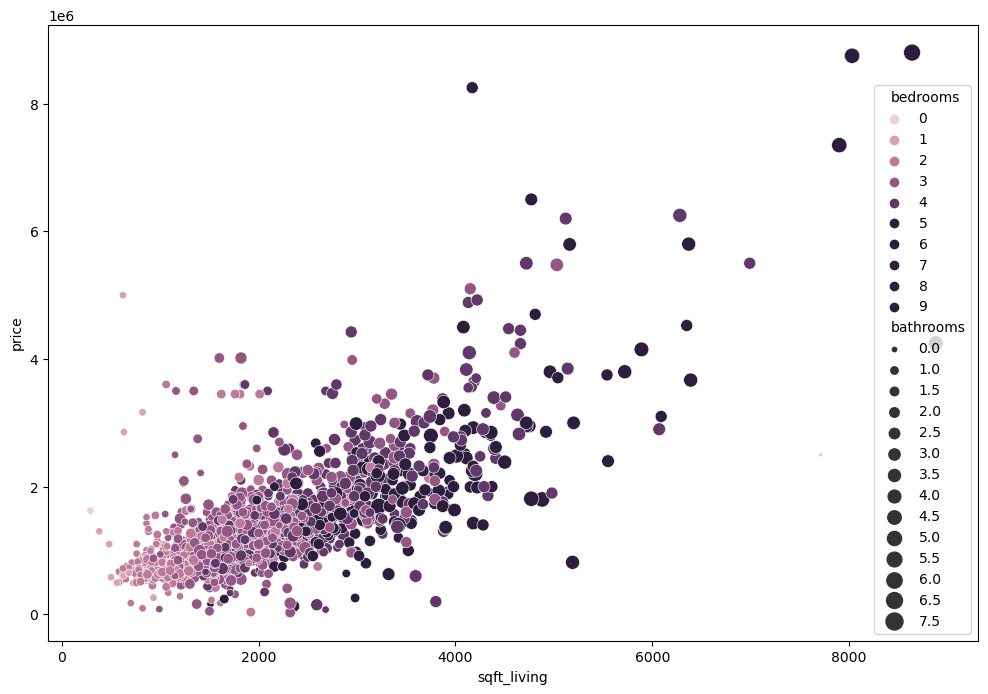

In [334]:
fig, ax = plt.subplots(figsize = (12,8))

sqft = data_near_amzn_filt['sqft_living']
price = data_near_amzn_filt['price']
bedrooms = data_near_amzn_filt['bedrooms']
nuisance = data_near_amzn_filt['nuisance']
dist = data_near_amzn_filt['distance_to_amazon']
greenbelt = data_near_amzn_filt['greenbelt']
bathrooms = data_near_amzn_filt['bathrooms']


sns.scatterplot(x = sqft, y = price, hue = bedrooms, hue_norm=(0, 5), size = bathrooms, ax=ax, sizes=(10, 150), legend="full");



In [ ]:
 sqft VS model price

In [ ]:
data_kc.columns

In [ ]:
fig, ax = plt.subplots(figsize=(12,10)) 
ax = sns.heatmap(data_kc[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'yr_built',
       'yr_renovated', 'zip_code']].corr(), annot=True, linewidths=.3)


In [ ]:
X = data_kc[['sqft_lot' ,'sqft_living', 'floors']]
y = data_kc['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit(X_train)


In [ ]:
X_standardized_train = ss.transform(X_train)

In [ ]:
X_standardized_test = ss.transform(X_test)

In [ ]:
lr_raw = LinearRegression()
lr_raw.fit(X_standardized_train, y_train)

lr_raw.score(X_standardized_train, y_train)

In [ ]:
lr_raw.score(X_standardized_test, y_test)

In [ ]:
pd.Series(lr_raw.coef_,
          index = X.columns) 

In [ ]:
y_pred = lr_raw.predict(X_standardized_test)
mean_absolute_error(y_pred, y_test)

In [ ]:
sns.pairplot(data[['price', 'sqft_lot', 'yr_built', 'sqft_living']])

In [ ]:
sorted(data_kc['grade'].unique())

In [ ]:
data_kc.columns

In [ ]:
grade_list = ['2 Substandard', '3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent','12 Luxury','13 Mansion']
cond_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
view_list = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']

In [ ]:
new_kcdf = pd.concat([closekcdf.reset_index().drop(columns = ['grade', 'condition', 'view']), ord_df],1)

In [ ]:
o_enc = OrdinalEncoder(categories = [grade_list, cond_list, view_list])
ord_df =pd.DataFrame(o_enc.fit_transform(closekcdf[['grade', 'condition', 'view']]), columns = closekcdf[['grade', 'condition', 'view']].columns)

In [ ]:
onehot_enc = OneHotEncoder(sparse = True, handle_unknown = 'ignore')

In [ ]:
nominal_cols = ['waterfront', 'greenbelt', 'heat_source', 'sewer_system','zip_code']

In [ ]:
ohe_df =onehot_enc.fit_transform(new_kcdf[nominal_cols])

In [ ]:
nominal_df = pd.DataFrame(ohe_df.toarray(),columns = onehot_enc.get_feature_names())

In [ ]:
cleandf = pd.concat([new_kcdf.drop(columns = ['waterfront', 'greenbelt', 'heat_source', 'sewer_system', 'zip_code']), nominal_df],1)

In [ ]:
data_focused['condition'].value_counts()

In [ ]:
data_focused['condition'] = data_focused['condition'].astype('category')

In [ ]:
data_focused['condition']

In [ ]:
data_focused.columns

In [ ]:
#data_focused['grade_num'] = data_focused['grade_num'].as_numeric

In [ ]:
heatmap_data = data_focused[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance',
       'condition', 'grade', 'distance_to_amazon', 'grade_num']]

In [ ]:
sns.heatmap(heatmap_data.corr(), annot = True)#, mask = heatmap_data.corr())

In [ ]:
data_focused['grade_num'] = data_focused['grade'].apply(lambda x: x.split(' ')[0])

In [ ]:
data_focused['grade_num'].value_counts()

In [ ]:
data['view'].value_counts()

In [ ]:
data_focused['grade_num'] = data_focused['grade_num'].astype('float')

In [ ]:
micro_coord = (47.63959872758785, -122.12826883333561)

amazon_coord = (47.606200, -122.332100)
amazing_coord = (47.615722, -122.339494)

In [ ]:
data_focused['location'] = list(zip(data_focused.lat, data_focused.long))

In [ ]:
data_focused['distance_to_amazon'] = data_focused['location'].apply(lambda x: geodesic(x, amazing_coord).miles)

In [ ]:
data_focused.describe()

In [ ]:
data_focused_15 = data_focused[data_focused['distance_to_amazon'] <= 15]

In [ ]:
data_focused_10 = data_focused[data_focused['distance_to_amazon'] <= 10]

In [ ]:
data

In [ ]:
data_focused_10['zip_code'] = data_focused_10['address'].apply(lambda x: zip_code(x))


In [ ]:
data_focused_10['zip_code'].nunique()

In [ ]:
data_focused_10['zip_category'] = data_focused_10['zip_code'].astype('int')

In [ ]:
sns.pairplot(data_focused_10[['price','zip_category', 'bedrooms', 'bathrooms']])

In [ ]:
def geo_distance(coord_a, coord_b):
    #take two coordinates and calculate distances in miles
    
    return geodesic(coord_a, coord_b).miles

In [ ]:
geodesic(micro_coord, (47.461975, -122.19052)).miles

In [ ]:
sorted(data_focused['grade_num'].unique())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_focused['grade_num'], data_focused['price'], test_size = 0.3)

lr_simple = LinearRegression()


In [ ]:
lr_simple.fit(X_train.values.reshape(-1,1), y_train)

In [ ]:
print(lr_simple.coef_, lr_simple.intercept_)

In [ ]:
lr_simple.score(X_train.values.reshape(-1,1),
                y_train)

In [ ]:
y_pred = lr_simple.predict(X_test.values.reshape(-1,1))
mean_absolute_error(y_pred, y_test)

In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit(X_train)
X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)

In [170]:
data_kc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip_code,township,location
22782,6642200450,6/22/2021,650000.0,3,2.5,2270,10993,1.0,NO,NO,...,570,90,1986,0,"5727 South 296th Place, Auburn, Washington 980...",47.335310,-122.261840,98001,Auburn,"(47.33531, -122.26184)"
22829,6181430200,7/26/2021,740000.0,4,2.5,3504,7500,2.0,NO,NO,...,441,380,2006,0,"3809 South 337th Street, Federal Way, Washingt...",47.299625,-122.283815,98001,Federal Way,"(47.299625, -122.283815)"
26067,4014400085,10/20/2021,670000.0,3,3.0,1950,40555,1.0,NO,NO,...,0,110,1941,0,"30820 42nd Avenue South, Auburn, Washington 98...",47.325130,-122.280980,98001,Auburn,"(47.32513, -122.28098)"
1499,3751602229,8/31/2021,395000.0,3,1.0,960,7200,1.0,NO,NO,...,0,400,1970,0,"35216 54th Avenue South, Auburn, Washington 98...",47.285610,-122.267170,98001,Auburn,"(47.28561, -122.26717)"
7478,2817850090,12/20/2021,578400.0,4,2.5,1690,6300,2.0,NO,NO,...,440,280,1998,0,"37649 37th Avenue South, Auburn, Washington 98...",47.263110,-122.287565,98001,Auburn,"(47.26311, -122.287565)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,2608600080,8/6/2021,619000.0,4,1.0,1350,21640,1.5,YES,NO,...,0,280,1964,0,"10055 Foss River Place Northeast, Skykomish, W...",47.694940,-121.298765,98288,Skykomish,"(47.69494, -121.298765)"
4748,774100475,10/5/2021,950000.0,3,2.0,2600,64626,1.5,NO,NO,...,0,360,2009,0,"69506 Northeast Money Creek Road, Skykomish, W...",47.718260,-121.405660,98288,Skykomish,"(47.71826, -121.40566)"
4638,2626119082,9/24/2021,450000.0,1,1.0,880,8087,1.0,YES,NO,...,0,0,1908,1996,"524 East Railroad Avenue, Skykomish, Washingto...",47.710030,-121.354260,98288,Skykomish,"(47.71003, -121.35426)"
9757,5061800021,11/8/2021,275000.0,3,1.0,930,7804,1.5,NO,NO,...,0,0,1910,0,"137 Dean Avenue, Skykomish, Washington 98288, ...",47.708140,-121.363070,98288,Skykomish,"(47.70814, -121.36307)"


In [211]:
data_kc = data_kc.drop(columns = 'township')

In [198]:
#data_kc without sale date
data_kc = data_kc.drop(columns = 'date')

KeyError: "['date'] not found in axis"

### MODELING

In [261]:
grade_list = ['2 Substandard','3 Poor','4 Low','5 Fair','6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent','12 Luxury','13 Mansion']
cond_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
view_list = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']

In [262]:
o_enc = OrdinalEncoder(categories = [grade_list, cond_list, view_list])
ord_df =pd.DataFrame(o_enc.fit_transform(data_kc[
    ['grade', 'condition', 'view']]), columns = data_kc[['grade', 'condition', 'view']].columns)

In [263]:
new_kcdf = pd.concat([data_kc.reset_index().drop(columns = ['grade', 'condition', 'view']), ord_df],1)

In [264]:
data_kc

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip_code,location
22782,6642200450,650000.0,3,2.5,2270,10993,1.0,NO,NO,NO,...,870,570,90,1986,0,"5727 South 296th Place, Auburn, Washington 980...",47.335310,-122.261840,98001,"(47.33531, -122.26184)"
22829,6181430200,740000.0,4,2.5,3504,7500,2.0,NO,NO,NO,...,0,441,380,2006,0,"3809 South 337th Street, Federal Way, Washingt...",47.299625,-122.283815,98001,"(47.299625, -122.283815)"
26067,4014400085,670000.0,3,3.0,1950,40555,1.0,NO,NO,NO,...,0,0,110,1941,0,"30820 42nd Avenue South, Auburn, Washington 98...",47.325130,-122.280980,98001,"(47.32513, -122.28098)"
1499,3751602229,395000.0,3,1.0,960,7200,1.0,NO,NO,NO,...,0,0,400,1970,0,"35216 54th Avenue South, Auburn, Washington 98...",47.285610,-122.267170,98001,"(47.28561, -122.26717)"
7478,2817850090,578400.0,4,2.5,1690,6300,2.0,NO,NO,NO,...,0,440,280,1998,0,"37649 37th Avenue South, Auburn, Washington 98...",47.263110,-122.287565,98001,"(47.26311, -122.287565)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,2608600080,619000.0,4,1.0,1350,21640,1.5,YES,NO,NO,...,0,0,280,1964,0,"10055 Foss River Place Northeast, Skykomish, W...",47.694940,-121.298765,98288,"(47.69494, -121.298765)"
4748,774100475,950000.0,3,2.0,2600,64626,1.5,NO,NO,NO,...,0,0,360,2009,0,"69506 Northeast Money Creek Road, Skykomish, W...",47.718260,-121.405660,98288,"(47.71826, -121.40566)"
4638,2626119082,450000.0,1,1.0,880,8087,1.0,YES,NO,YES,...,0,0,0,1908,1996,"524 East Railroad Avenue, Skykomish, Washingto...",47.710030,-121.354260,98288,"(47.71003, -121.35426)"
9757,5061800021,275000.0,3,1.0,930,7804,1.5,NO,NO,YES,...,740,0,0,1910,0,"137 Dean Avenue, Skykomish, Washington 98288, ...",47.708140,-121.363070,98288,"(47.70814, -121.36307)"


In [265]:
onehot_enc = OneHotEncoder(sparse = True, handle_unknown = 'ignore')

In [266]:
nominal_cols = ['waterfront', 'greenbelt', 'heat_source', 'sewer_system','zip_code', 'nuisance']

In [267]:
ohe_df =onehot_enc.fit_transform(new_kcdf[nominal_cols])

In [268]:
nominal_df = pd.DataFrame(ohe_df.toarray(),columns = onehot_enc.get_feature_names_out())

In [269]:
cleandf = pd.concat([new_kcdf.drop(columns = 
    ['waterfront', 'greenbelt', 'heat_source', 'sewer_system', 'zip_code', 'nuisance']), nominal_df],1)

In [270]:
lr = LinearRegression()

In [335]:
col_select = cleandf.drop(columns = ['price', 'index', 'address','sqft_garage', 'location']).columns
X = cleandf[col_select]
y = cleandf['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [336]:
lr.fit(X_train, y_train)

LinearRegression()

In [273]:
lr.score(X_train, y_train)

0.6457137791079266

In [274]:
y_pred = lr.predict(X_test)
y_pred[0:10]

array([1162704.33537054,  244216.40901703, 2163014.2277424 ,
       1836411.96798572, 1020798.86050683,  676855.56821615,
        681027.29656935, 1785258.47321197,  850027.66668022,
        849130.45111391])

In [275]:
MAE = mean_absolute_error(y_pred, y_test)
MAE

264601.35226099344

In [247]:
ss = StandardScaler()

In [248]:
ss.fit(X_train)

StandardScaler()

In [249]:
X_standardized_train = ss.fit_transform(X_train)

In [250]:
X_standardized_test = ss.transform(X_test)

In [251]:

#lr.fit(X_standardized_train, y_train)

#lr.score(X_standardized_train, y_train)

0.6395298130565259

In [252]:
#lr.score(X_standardized_test, y_test)

0.6926633964327642

In [253]:
#mean_absolute_error(y_pred, y_test)

263823.237203895

 results.summary()

In [254]:
data_kc

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip_code,location
22782,6642200450,650000.0,3,2.5,2270,10993,1.0,NO,NO,NO,...,870,570,90,1986,0,"5727 South 296th Place, Auburn, Washington 980...",47.335310,-122.261840,98001,"(47.33531, -122.26184)"
22829,6181430200,740000.0,4,2.5,3504,7500,2.0,NO,NO,NO,...,0,441,380,2006,0,"3809 South 337th Street, Federal Way, Washingt...",47.299625,-122.283815,98001,"(47.299625, -122.283815)"
26067,4014400085,670000.0,3,3.0,1950,40555,1.0,NO,NO,NO,...,0,0,110,1941,0,"30820 42nd Avenue South, Auburn, Washington 98...",47.325130,-122.280980,98001,"(47.32513, -122.28098)"
1499,3751602229,395000.0,3,1.0,960,7200,1.0,NO,NO,NO,...,0,0,400,1970,0,"35216 54th Avenue South, Auburn, Washington 98...",47.285610,-122.267170,98001,"(47.28561, -122.26717)"
7478,2817850090,578400.0,4,2.5,1690,6300,2.0,NO,NO,NO,...,0,440,280,1998,0,"37649 37th Avenue South, Auburn, Washington 98...",47.263110,-122.287565,98001,"(47.26311, -122.287565)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,2608600080,619000.0,4,1.0,1350,21640,1.5,YES,NO,NO,...,0,0,280,1964,0,"10055 Foss River Place Northeast, Skykomish, W...",47.694940,-121.298765,98288,"(47.69494, -121.298765)"
4748,774100475,950000.0,3,2.0,2600,64626,1.5,NO,NO,NO,...,0,0,360,2009,0,"69506 Northeast Money Creek Road, Skykomish, W...",47.718260,-121.405660,98288,"(47.71826, -121.40566)"
4638,2626119082,450000.0,1,1.0,880,8087,1.0,YES,NO,YES,...,0,0,0,1908,1996,"524 East Railroad Avenue, Skykomish, Washingto...",47.710030,-121.354260,98288,"(47.71003, -121.35426)"
9757,5061800021,275000.0,3,1.0,930,7804,1.5,NO,NO,YES,...,740,0,0,1910,0,"137 Dean Avenue, Skykomish, Washington 98288, ...",47.708140,-121.363070,98288,"(47.70814, -121.36307)"


In [255]:
X

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_patio,yr_built,...,zip_code_98168,zip_code_98177,zip_code_98178,zip_code_98188,zip_code_98198,zip_code_98199,zip_code_98224,zip_code_98288,nuisance_NO,nuisance_YES
0,6642200450,3,2.5,2270,10993,1.0,1760,870,90,1986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,6181430200,4,2.5,3504,7500,2.0,3504,0,380,2006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4014400085,3,3.0,1950,40555,1.0,1950,0,110,1941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3751602229,3,1.0,960,7200,1.0,960,0,400,1970,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2817850090,4,2.5,1690,6300,2.0,1690,0,280,1998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29144,2608600080,4,1.0,1350,21640,1.5,1350,0,280,1964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
29145,774100475,3,2.0,2600,64626,1.5,2600,0,360,2009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
29146,2626119082,1,1.0,880,8087,1.0,880,0,0,1908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29147,5061800021,3,1.0,930,7804,1.5,930,740,0,1910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [276]:
model_full_predict = lr.predict(X)

In [288]:
model_full_predict

array([ 779054.38234249, 1099211.93328506,  671116.71568313, ...,
       1353984.26593038, -171329.04849529, -455426.36032781])

In [290]:
model_predict_rounded = [round(model_full_predict[x], 1) for x in range(len(model_full_predict))]

In [291]:
data_kc['model_predict'] = model_predict_rounded

In [299]:
data_kc['mean_sq_er'] = (data_kc['price'] - data_kc['model_predict'])**2

In [315]:
data_kc = data_kc[['id', 'price' , 'model_predict','abs_err', 'mae', 'mean_sq_er', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long', 'zip_code', 'location']]

In [318]:
data_kc['mae'] = sum(abs(data_kc['model_predict'] - data_kc['price'])) / len(data_kc['model_predict'])

In [313]:
data_kc['abs_err'] = abs(data_kc['model_predict'] - data_kc['price'])

In [319]:
data_kc

,id,price,model_predict,abs_err,mae,mean_sq_er,bedrooms,bathrooms,sqft_living,sqft_lot,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip_code,location
22782,6642200450,650000.0,779054.4,129054.4,260813.939401,1.665504e+10,3,2.5,2270,10993,...,870,570,90,1986,0,"5727 South 296th Place, Auburn, Washington 980...",47.335310,-122.261840,98001,"(47.33531, -122.26184)"
22829,6181430200,740000.0,1099211.9,359211.9,260813.939401,1.290332e+11,4,2.5,3504,7500,...,0,441,380,2006,0,"3809 South 337th Street, Federal Way, Washingt...",47.299625,-122.283815,98001,"(47.299625, -122.283815)"
26067,4014400085,670000.0,671116.7,1116.7,260813.939401,1.247019e+06,3,3.0,1950,40555,...,0,0,110,1941,0,"30820 42nd Avenue South, Auburn, Washington 98...",47.325130,-122.280980,98001,"(47.32513, -122.28098)"
1499,3751602229,395000.0,185723.9,209276.1,260813.939401,4.379649e+10,3,1.0,960,7200,...,0,0,400,1970,0,"35216 54th Avenue South, Auburn, Washington 98...",47.285610,-122.267170,98001,"(47.28561, -122.26717)"
7478,2817850090,578400.0,333662.2,244737.8,260813.939401,5.989659e+10,4,2.5,1690,6300,...,0,440,280,1998,0,"37649 37th Avenue South, Auburn, Washington 98...",47.263110,-122.287565,98001,"(47.26311, -122.287565)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,2608600080,619000.0,966284.0,347284.0,260813.939401,1.206062e+11,4,1.0,1350,21640,...,0,0,280,1964,0,"10055 Foss River Place Northeast, Skykomish, W...",47.694940,-121.298765,98288,"(47.69494, -121.298765)"
4748,774100475,950000.0,1078031.0,128031.0,260813.939401,1.639194e+10,3,2.0,2600,64626,...,0,0,360,2009,0,"69506 Northeast Money Creek Road, Skykomish, W...",47.718260,-121.405660,98288,"(47.71826, -121.40566)"
4638,2626119082,450000.0,1353984.3,903984.3,260813.939401,8.171876e+11,1,1.0,880,8087,...,0,0,0,1908,1996,"524 East Railroad Avenue, Skykomish, Washingto...",47.710030,-121.354260,98288,"(47.71003, -121.35426)"
9757,5061800021,275000.0,-171329.0,446329.0,260813.939401,1.992096e+11,3,1.0,930,7804,...,740,0,0,1910,0,"137 Dean Avenue, Skykomish, Washington 98288, ...",47.708140,-121.363070,98288,"(47.70814, -121.36307)"


In [329]:
ax.plot(data_kc['sqft_living'], data_kc['model_predict'])

In [327]:
reg = data_kc['sqft_living'], data_kc['model_predict']